<a href="https://colab.research.google.com/github/pichaiku/DataTables/blob/master/AI_week03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **บทที่ 3 การเรียนรู้ของเครื่อง1**


*  3.1 แนะนำการเรียนรู้ของเครื่อง
*  3.2 เค-เนียร์เรสต์เนเบอร์ (K-Nearest Neighbours)
*  3.3 ออร์ดินารีลีสต์สแควร์ (Ordinary Least Squares)
*  3.4 โครงข่ายประสาทเทียม (Artificial Neural Networks)


# **3.1 แนะนำการเรียนรู้ของเครื่อง**

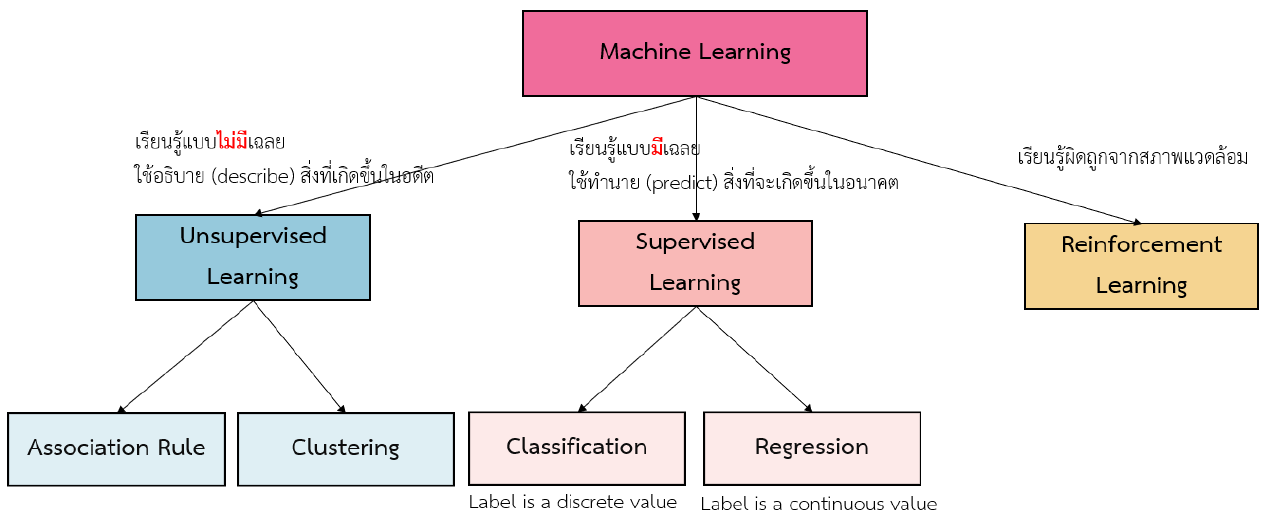

##**3.1.1 การเรียนรู้แบบไม่มีผู้สอน (Unsupervised Learning)**

###**กฎความสัมพันธ์ (Association Rule)**

การวิเคราะห์ข้อมูลการซื้อขายสินค้าเพื่อแนะนำสินค้าในร้านค้า กำหนดโปรโมชัน และใช้ในการจัดวางสินค้าในร้าน ตัวอย่างกฎความสัมพันธ์ที่ได้จากการวิเคราะห์ข้อมูลการซื้อขายสินคา เช่น

<b><h3 align="center">{นม, ขนมปัง} → {กาแฟ}</h3></b>

หมายความว่า ถ้าลูกค้าซื้อนมและขนมปัง แล้วมีโอกาสสูงที่ลูกค้าจะซื้อกาแฟด้วยซึ่งผู้ขายสามารถนำเอากฎความสัมพันธ์นี้ไปกำหนดโปรโมชันได้ เช่น ถ้าลูกค้าซื้อนมและขนมปังแล้วจะให้ส่วนลดในการซื้อกาแฟ เพื่อเป็นการกระตุ้นยอดขาย เทคนิคกฎความสัมพันธ์ที่นิยมใช้ เช่น เอพีออรี (Apirori) เอฟพี-โกรธ (FP-Growth)

###**การจัดกลุ่ม (Clustering)**

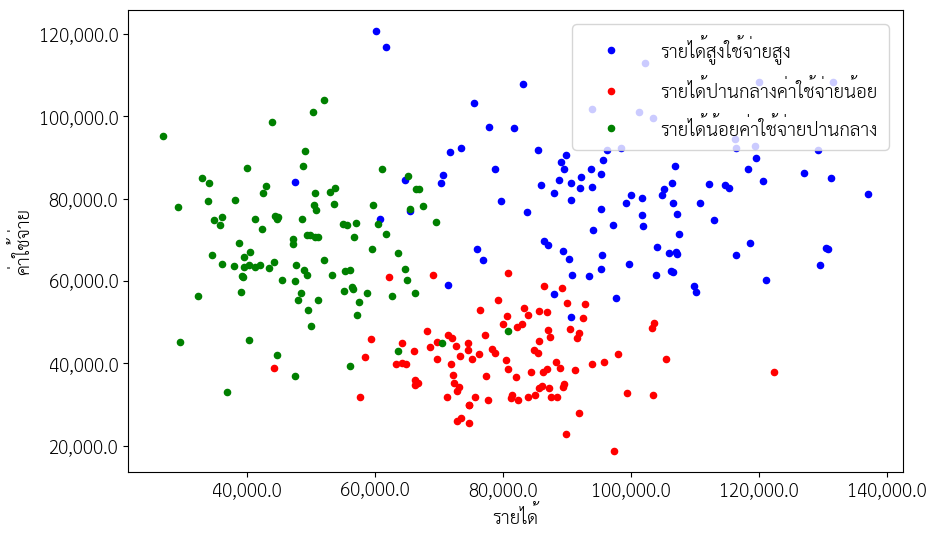

##**3.1.2 การเรียนรู้แบบมีผู้สอน (Supervised Learning)**

###**การจำแนกกลุ่ม (Classification)**

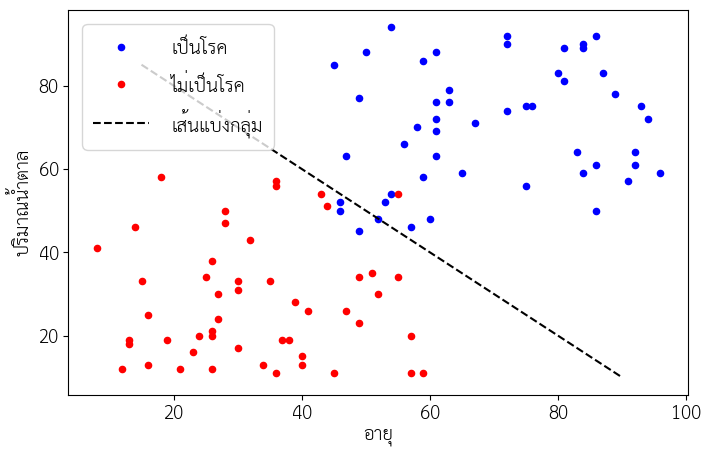

### **การถดถอยหรือการทำนายค่าต่อเนื่อง (Regression)**

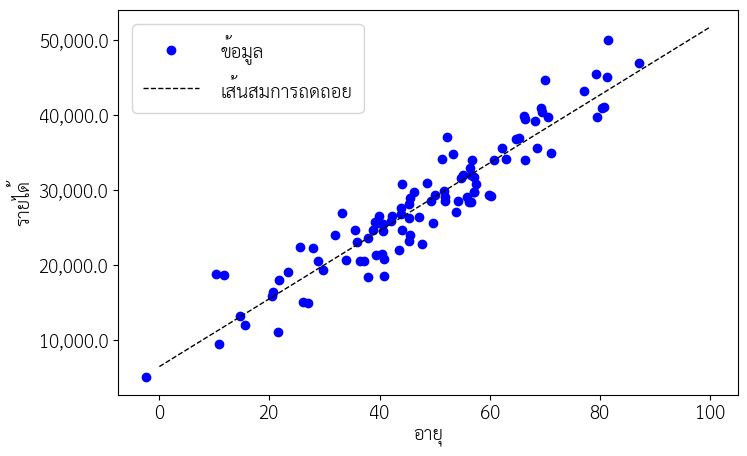

##**3.1.3 การเรียนรู้แบบสนับสนุน (Reinforcement Learning)**

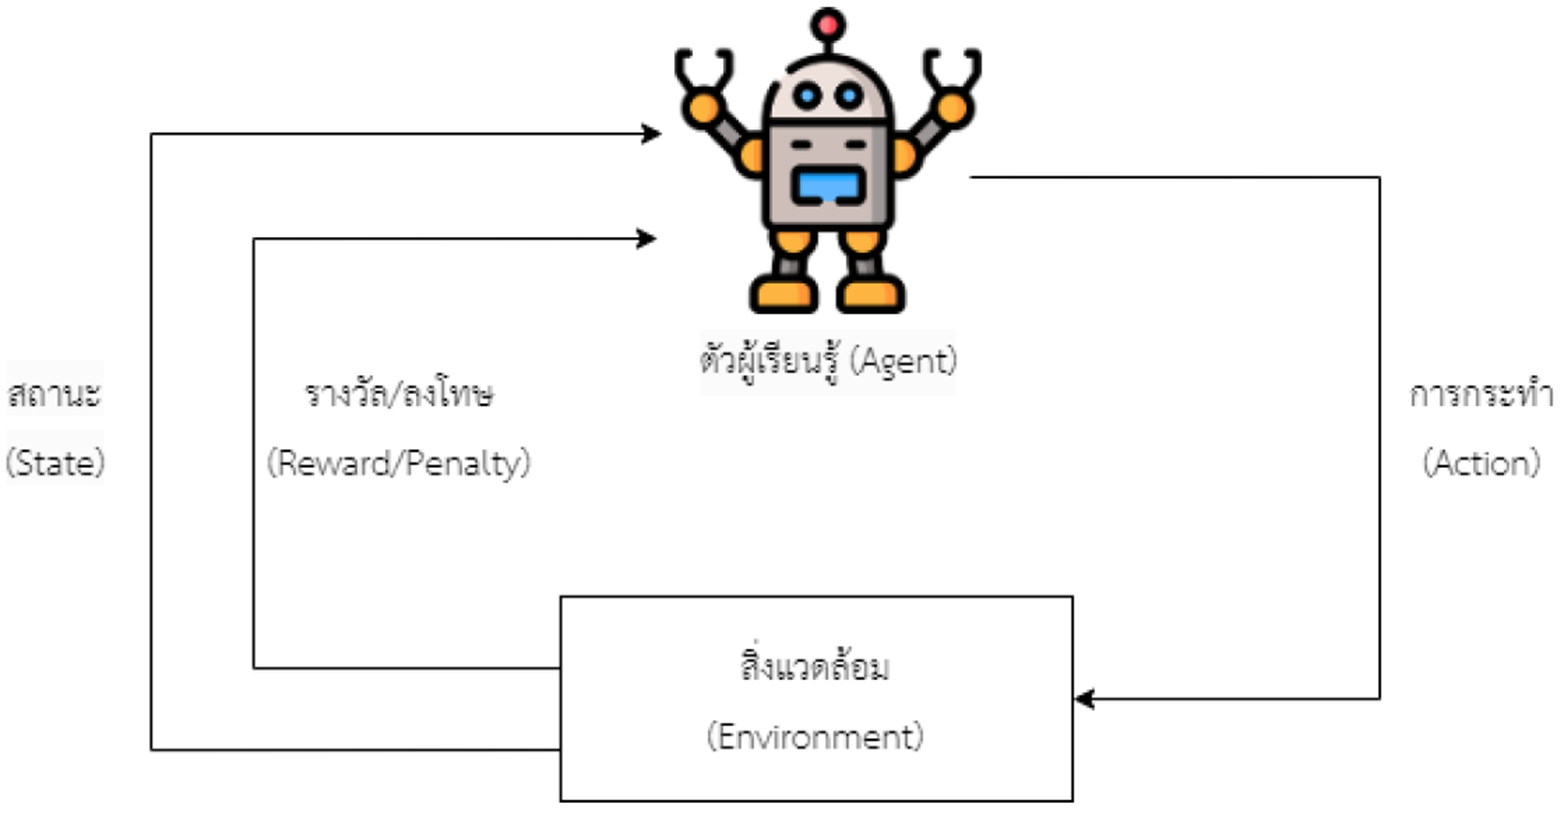

# **3.2 เค-เนียร์เรสต์เนเบอร์ (K-Nearest Neighbours)**

## **3.2.3 ซอร์สโค้ดของอัลกอริทึมเค-เนียร์เรสต์เนเบอร์**

> **ภาพที่ 3.7 ซอร์สโค้ดของอัลกอริทึมเค-เนียร์เรสต์เนเบอร์**

In [ ]:
#KNN-based classification model with arbitrary k
import math
from scipy import stats

x_train = [[1,2],[1,2],[1,2],[3,2],[3,1],[3,1],[3,2],[2,2],[1,2],[3,3]]
y_train = [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
x_test = [3,3]
k = 3

#step 1. คำนวณหาระยะทาง
dist = []
for i in range(len(x_train)):
    d = math.sqrt( pow(x_test[0] - x_train[i][0], 2) +
                  pow(x_test[1] - x_train[i][1], 2) )
    dist.append(round(d,2))

print('ระยะทาง คือ', dist)

#step 2. หา index ของ traning points ที่ใกล้กับ test point ที่สุด k ตัว
sort_dist = sorted(dist.copy())[:k]

index = []
for s in sort_dist:
    for i, value in enumerate(dist):
        if s == value:
            index.append(i)

        if len(index) == k:
            break;

print('อินเดกซ์ของข้อมูลฝึก 3 อันดับแรก คือ', index)

#step 3. หาคำตอบ จากคำตอบหรือตัวแปรตามของ traning points ที่ใกล้ที่สุด k ตัว
y_pred = [y_train[i] for i in index]
mode = stats.mode(y_pred, keepdims=True)[0]

print('คำตอบของข้อมูลฝึก 3 อันดับแรก คือ', y_pred)
print('คำตอบของข้อมูลทดสอบ คือ', mode)

> **ภาพที่ 3.8 ซอร์สโค้ดของอัลกอริทึมเค-เนียร์เรสต์เนเบอร์ ด้วยไซคิต-เลิร์น (Scikit-Learn) แบบที่ 1**

In [ ]:
#Import Python library
from sklearn.neighbors import NearestNeighbors
from scipy import stats

#Load Data
x_train = [[1,2],[1,2],[1,2],[3,2],[3,1],[3,1],[3,2],[2,2],[1,2],[3,3]]
y_train = [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
x_test = [3,3]
k = 3

#step 1. คำนวณหาระยะทาง
#step 2. หา index ของ traning points ที่ใกล้กับ test point ที่สุด k ตัว
net = NearestNeighbors(n_neighbors = k, metric = 'minkowski', p = 2)
net.fit(x_train,y_train)
dist, index = net.kneighbors([x_test])

print('ระยะทางของข้อมูลฝึก 3 อันดับแรก คือ', dist)
print('อินเดกซ์ของข้อมูลฝึก 3 อันดับแรก คือ', index)

#step 3. หาคำตอบ จากคำตอบหรือตัวแปรตามของ traning points ที่ใกล้ที่สุด k ตัว
y_pred = [y_train[i] for i in index[0]]
mode = stats.mode(y_pred, keepdims=True)[0]

print('คำตอบของข้อมูลฝึก 3 อันดับแรก คือ', y_pred)
print('คำตอบของข้อมูลทดสอบ คือ', mode)

> **ภาพที่ 3.9 ซอร์สโค้ดของอัลกอริทึมเค-เนียร์เรสต์เนเบอร์ ด้วยไซคิต-เลิร์น (Scikit-Learn) แบบที่ 2**

In [ ]:
#Import Python library
from sklearn.neighbors import KNeighborsClassifier

#Load Data
x_train = [[1,2],[1,2],[1,2],[3,2],[3,1],[3,1],[3,2],[2,2],[1,2],[3,3]]
y_train = [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
x_test = [3,3]
k = 3

#Build Model
net = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski', p = 2)
net.fit(x_train,y_train)

#Test Model
y_pred=net.predict([x_test])
print('คำตอบของข้อมูลทดสอบ คือ', y_pred)

# **3.3 Ordinary Least Squares (OLS)**

> **ภาพที่ 3.10 กราฟแสดงความสัมพันธ์ระหว่างอายุกับรายได้**

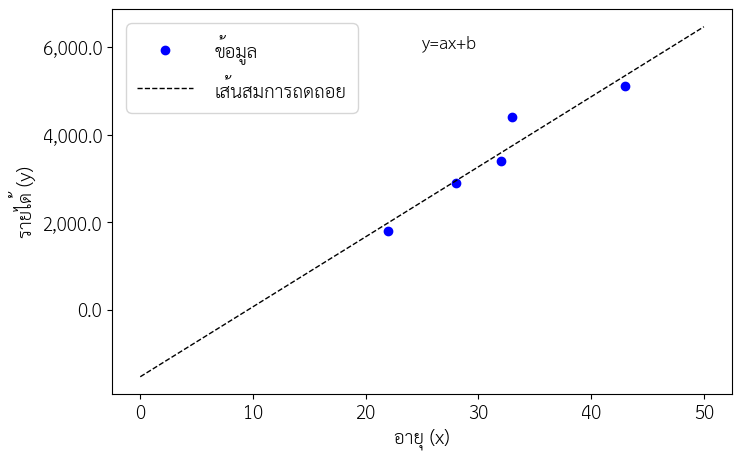

##**3.3.3 ซอร์สโค้ดของออร์ดินารีลีสต์สแควร์**

> **ภาพที่ 3.11 ซอร์สโค้ดของอัลกอริทึมออร์ดินารีลีสต์สแควร์**

In [ ]:
#Import Python Library
import numpy as np
from numpy.linalg import inv

#Load Data
x_train = np.array([[1,22], [1,28], [1,32], [1,33], [1,43]])
y_train = np.array([1800, 2900, 3400, 4400, 5100])
x_test = np.array([23, 25])

#Build Model
#คำนวณซูโดอินเวิร์ส X^+=〖(X^T X)〗^(-1) X^T
mat_trans = np.transpose(x_train) # x^T
mat_mul = np.matmul(mat_trans, x_train) # X^T X
inverse = np.linalg.inv(mat_mul) # 〖(X^T X)〗^(-1)
pseudo_inv = np.matmul(inverse, mat_trans) #  (x^T*x)^-1 * x^T

#คำนวณค่าสัมประสิทธิ์ เมื่อ β =〖(X^T X)〗^(-1) X^T y
beta = np.matmul(pseudo_inv, y_train)
print(f'สมการถดถอยเชิงเส้น คือ y={round(beta[0], 2)} + {round(beta[1], 2)}x')

#Test Model
for x in x_test:
    print(f'เมื่อ x =', x)
    print('จะได้')
    print(f'y={round(beta[0] + beta[1] * x, 2)} บาท')
    print('')


> **ภาพที่ 3.12 ซอร์สโค้ดของอัลกอริทึมออร์ดินารีลีสต์สแควร์ด้วยไซคิต-เลิร์น**

In [ ]:
#Import Python Library
import numpy as np
from sklearn import linear_model

#Load Data
x_train = np.array([22, 28, 32, 33, 43]).reshape(-1,1)
y_train = np.array([1800, 2900, 3400, 4400, 5100]).reshape(-1,1)
x_test = np.array([23, 25]).reshape(-1,1)

#Build Model
net=linear_model.LinearRegression()
net.fit(x_train,y_train)

print('สมการถดถอยเชิงเส้น คือ ', end='')
print(f'y={round(net.intercept_[0], 2)} + {round(net.coef_[0][0], 2)}x')

#Test Model
y_pred=net.predict(x_test)

for i,x in enumerate(x_test):
    print(f'เมื่อ x =', x[0])
    print('จะได้')
    print(f'y={round(y_pred[i][0], 2)} บาท')
    print('')

# **3.4 Artificial Neural Network (ANN)**

## **3.4.1 ซิงเกิลเลเยอร์เพอร์เซปทรอน**

### **3.4.1.5 ซอร์สโค้ดของซิงเกิลเลเยอร์เพอร์เซปทรอน**

> **ภาพที่ 3.16 ซอร์สโค้ดของซิงเกิลเลเยอร์เพอร์เซปทรอนด้วยไซคิต-เลิร์น แบบที่ 1**

In [ ]:
#Import Python Library
import numpy as np
from sklearn.neural_network import MLPClassifier

#Load Data and Divide data into (Traning test data)
x_train = np.array([[37, 43],[25, 21],[53, 26],[39, 15],[31, 52],[53, 72],[57, 52],[50, 56],[45, 66],[73, 92]])
y_train = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])
x_test = np.array([[40, 25],[70, 80]])

#Build Model
net = MLPClassifier(solver='sgd',
                    hidden_layer_sizes=(),
                    max_iter=1000,random_state=10)
net.fit(x_train,y_train)
print(f'weight: {net.coefs_}') #show weight
print(f'bias: {net.intercepts_}') #show bias

#Test Model
y_pred = net.predict(x_test)
print(f'class label: {y_pred}')

#net.out_activation_

> **ภาพที่ 3.17 ซอร์สโค้ดของซิงเกิลเลเยอร์เพอร์เซปทรอนด้วยไซคิต-เลิร์น แบบที่ 2**

In [ ]:
#Import Python Library
import numpy as np
from sklearn.neural_network import MLPRegressor

#Load Data and Divide data into (Traning test data)
x_train = np.array([[22,1], [28,2], [32,2], [33,2], [43,1]])
y_train = np.array([1800, 2900, 3400, 4400, 5100])
x_test = np.array([[23,1], [25,2]])

#Build Model
net = MLPRegressor(solver='sgd',
                    hidden_layer_sizes=(),
                    learning_rate_init=0.001,
                    max_iter=1000)
net.fit(x_train,y_train)
print(f'weight: {net.coefs_}') #show weight
print(f'bias: {net.intercepts_}') #show bias

#Test Model
y_pred=net.predict(x_test)
print(y_pred)

In [ ]:
net.out_activation_

## **3.4.2 MultiLayer Perceptron (MLP)**

### **3.4.2.3 ซอร์สโค้ดของมัลติเลเยอร์เพอร์เซปทรอน**

> **ภาพที่ 3.20 ซอร์สโค้ดของมัลติเลเยอร์เพอร์เซปทรอนด้วยไซคิต-เลิร์น แแบที่ 1**



In [ ]:
#Import Python Library
import numpy as np
from sklearn.neural_network import MLPClassifier

#Load Data
x_train = np.array([[37, 43],[25, 21],[53, 26],[39, 15],[31, 52],
                    [53, 72],[57, 52],[50, 56],[45, 66],[73, 92]])
y_train = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])
x_test = np.array([[40, 25],[70, 80]])

#Build Model
net = MLPClassifier(solver='sgd',
                    activation='logistic',
                    hidden_layer_sizes=(3),
                    learning_rate_init=0.001,
                    max_iter=1000,random_state=3)
net.fit(x_train,y_train)
print(f'weight: {net.coefs_}') #show weight
print(f'bias: {net.intercepts_}') #show bias

#Test Model
y_pred = net.predict(x_test)
print(f'class label: {y_pred}')

> **ภาพที่ 3.21 ซอร์สโค้ดของมัลติเลเยอร์เพอร์เซปทรอนด้วยไซคิต-เลิร์น แแบที่ 2**



In [ ]:
#Import Python Library
import numpy as np
from sklearn.neural_network import MLPRegressor

#Load Data
x_train = np.array([[22,1], [28,2], [32,2], [33,2], [43,1]])
y_train = np.array([1800, 2900, 3400, 4400, 5100])
x_test = np.array([[23,1], [25,2]])

#Build Model
net = MLPRegressor(solver='sgd',
                    activation='logistic',
                    hidden_layer_sizes=(3),
                    learning_rate_init=0.001,
                    max_iter=1000)
net.fit(x_train,y_train)
print(f'weight: {net.coefs_}') #show weight
print(f'bias: {net.intercepts_}') #show bias

#Test Model
y_pred=net.predict(x_test)
print(y_pred)

# **วิเคราะห์ข้อมูลเบื้องต้น**

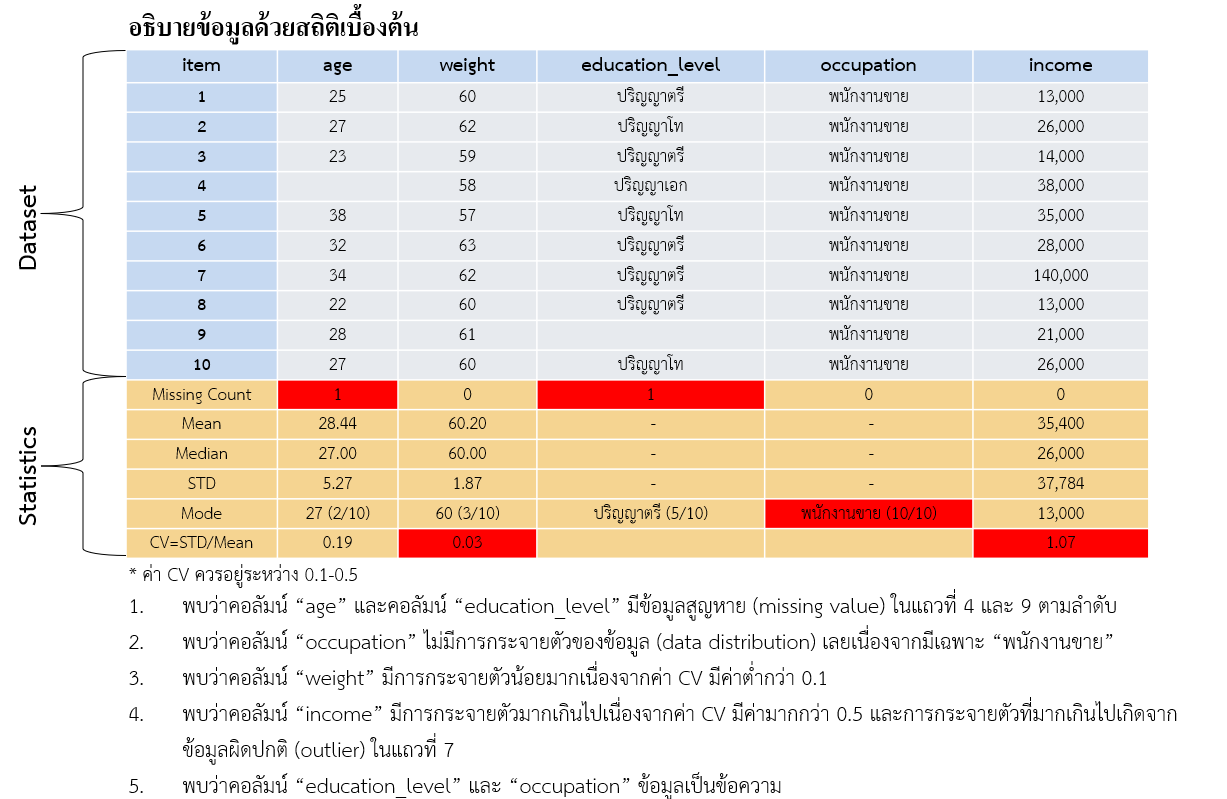

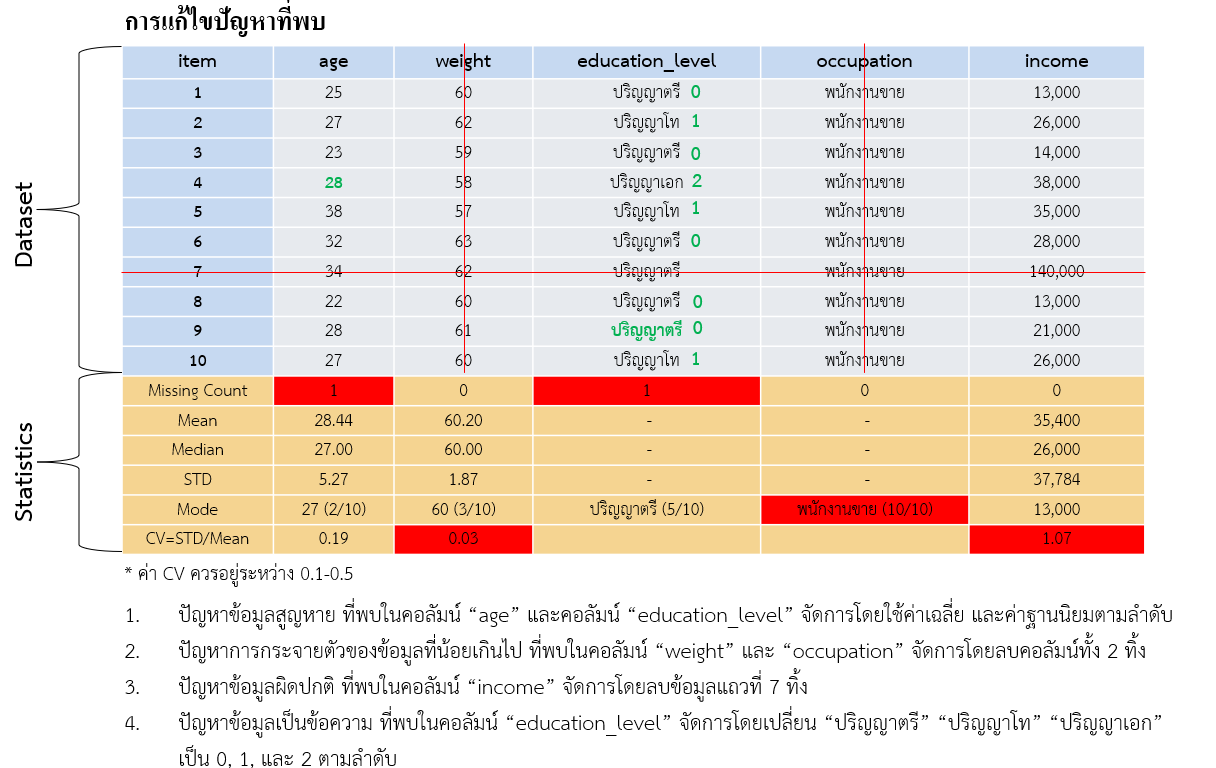

## **2. เตรียมความพร้อม**

**ดาวน์โหลด dataset ได้ที่**
https://drive.google.com/drive/folders/1T3ciROj8tHnlwiGW3xN3Bqx5hJkspEOz?usp=sharing

In [ ]:
#เชื่อต่อ Google Drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#ดาวน์โหลดฟอนต์
!wget -q http://www.arts.chula.ac.th/ling/wp-content/uploads/TH-Sarabun_Chula1.1.zip -O font.zip
!unzip -qj font.zip TH-Sarabun_Chula1.1/THSarabunChula-Regular.ttf

In [ ]:
#ติดตั้งฟอนต์
import matplotlib as plt

plt.font_manager.fontManager.addfont('THSarabunChula-Regular.ttf')
plt.rcParams['font.family']='TH Sarabun Chula'
plt.rcParams['font.size']='14'
plt.rcParams['font.weight']='bold'

In [ ]:
#อ่านข้อมูลจากไฟล์ excel
import pandas as pd
data = pd.read_excel('/content/drive/MyDrive/data/customer.xlsx')
data

In [ ]:
#Copy ข้อมูล
df = data.copy()

## **2. ตรวจสอบและจัดการข้อมูลสูญหาย (Missing value)**

In [ ]:
#ตรวจสอบข้อมูลสูญหายในแต่ละคอลัมน์
df.isnull().sum()

In [ ]:
#แทนข้อมูลสูญหายด้วยค่าเฉลี่ย
average_value = round(df['age'].mean(),0)
df['age'] = df['age'].fillna( average_value )
df

In [ ]:
#แทนข้อมูลสูญหายด้วยค่าฐานนิยม
mode_values = df.mode().iloc[0,2]
df['education_level'] = df['education_level'].fillna(mode_values)
df

## **2. ตรวจสอบและจัดการข้อมูลที่มีการกระจายตัวน้อย (data distribution)**

### **2.1 การกระจายตัวของข้อมูลเชิงปริมาณ**

In [ ]:
#ดูค่าสถิติเบื้องต้น
df.describe()

In [ ]:
#คำนวณค่าสัมประสิทธิ์ความแปรปรวม (C.V)
import numpy as np
numeric_df = df.select_dtypes(include=[np.number])
cv = numeric_df.std() / numeric_df.mean()
cv

In [ ]:
#ลบคอลัมน์ที่มีค่า c.v. น้อยกว่า 0.1
df.drop(columns=['weight'], inplace=True)
df

### **2.2 การกระจายตัวของข้อมูลเชิงคุณภาพ**

In [ ]:
#แสดงความถี่ของคอลัมน์ education_level
stat = df.groupby(['education_level']).size()
stat.plot.bar()
stat

In [ ]:
#แสดงความถี่ของคอลัมน์ occupation
stat = df.groupby(['occupation']).size()
stat.plot.bar()
stat

In [ ]:
#ลบคอลัมน์ที่มีแค่ค่าเดียว
df.drop(columns=['occupation'], inplace=True)
df

## **3. ตรวจสอบและจัดการข้อมูลผิดปกติ (Outliers)**

In [ ]:
#ตรวจสอบ outliers
df.boxplot()

In [ ]:
#จัดการ outliers ด้วยวิธีการลบ record
df = df.drop(index=6)
df

In [ ]:
#Reindex the dataframe
df = df.reset_index(drop=True)
df

## **4. แปลงข้อมูลข้อความเป็นตัวเลข**

In [ ]:
df.replace('ปริญญาตรี', 0, inplace=True)
df.replace('ปริญญาโท', 1, inplace=True)
df.replace('ปริญญาเอก', 2, inplace=True)
df

#**ประยุกต์ใช้งานจริง**

## **การจำแนกกลุ่ม (Classification)**

> **KNN**

In [ ]:
#Import Python Library
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from IPython.display import display
import joblib

#Load Data
data = pd.read_excel('/content/drive/MyDrive/data/heart.xlsx')
print(display(data))
x=data.iloc[:,0:len(data.columns)-1]
y=data.iloc[:,len(data.columns)-1]

#Divide Training/Test data แบบ Hold out
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.3,
                                                    random_state=0)

#Build Model
net = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p=2)
net.fit(x_train,y_train)

#Test Model
y_pred=net.predict(x_test)

#Evaluate Model
print('accuracy metrics: ')
print(classification_report(y_test, y_pred))

#Export Model
joblib.dump(net,"heart.pkl")

> **SLP**

In [ ]:
#Import python library
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from IPython.display import display
import joblib

#Load data
data = pd.read_excel('/content/drive/MyDrive/data/heart.xlsx')
print(display(data))
x=data.iloc[:,0:len(data.columns)-1]
y=data.iloc[:,len(data.columns)-1]

#Divide Training/Test data แบบ Hold out
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.3,
                                                    random_state=0)
#Build Model
net = MLPClassifier(solver='adam',
                    activation='logistic',
                    hidden_layer_sizes=(),
                    batch_size=32,
                    learning_rate_init=0.01,
                    max_iter=200)
net.fit(x_train,y_train)
# print(f'weight: {net.coefs_}') #show weight
# print(f'bias: {net.intercepts_}') #show bias

#Test Model
y_pred=net.predict(x_test)

#Evaluate Model
print('accuracy metrics: ')
print(classification_report(y_test, y_pred))

#Export Model
joblib.dump(net,"heart.pkl")

> **MLP**

In [ ]:
#Import python library
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from IPython.display import display
import joblib

#Load data
data = pd.read_excel('/content/drive/MyDrive/data/heart.xlsx')
print(display(data))
x=data.iloc[:,0:len(data.columns)-1]
y=data.iloc[:,len(data.columns)-1]

#Divide Training/Test data แบบ Hold out
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.3,
                                                    random_state=0)
#Build Model
net = MLPClassifier(solver='adam',
                    activation='logistic',
                    hidden_layer_sizes=(2),
                    batch_size=32,
                    learning_rate_init=0.01,
                    max_iter=200)

net.fit(x_train,y_train)
# print(f'weight: {net.coefs_}') #show weight
# print(f'bias: {net.intercepts_}') #show bias

#Test Model
y_pred=net.predict(x_test)

#Evaluate Model
print('accuracy metrics: ')
print(classification_report(y_test, y_pred))

#Export Model
joblib.dump(net,"heart.pkl")

## **การถดถอยหรือการทำนายค่าต่อเนื่อง (Regression)**

> **KNN**

In [ ]:
#Import Python Library
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from IPython.display import display
import joblib

#Load Data
data = pd.read_excel('/content/drive/MyDrive/data/price_house.xlsx')
print(display(data))
x=data.iloc[:,1:len(data.columns)-1]
y=data.iloc[:,len(data.columns)-1]

#Divide Training/Test data แบบ Hold out
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.3,
                                                    random_state=0)

#Build Model
net = KNeighborsRegressor(n_neighbors = 3, metric = 'minkowski', p=2)
net.fit(x_train,y_train)

#Test Model
y_pred=net.predict(x_test)

#Evaluate Model
mape=np.mean(np.absolute(y_test - y_pred) / y_test * 100)
print('MAPE :', np.round(mape,2))

#Export Model
joblib.dump(net,"house_price_model.pkl")

> **OLS**

In [ ]:
#mport python library
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from IPython.display import display
import joblib

#Load data
data=pd.read_excel('/content/drive/MyDrive/data/price_house.xlsx')
print(display(data))
x=data.iloc[:,1:len(data.columns)-1]
y=data.iloc[:,len(data.columns)-1]

#Divide Training/Test data แบบ Hold out
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.3,
                                                    random_state=0)
#Build/Train Model
net=linear_model.LinearRegression()
net.fit(x_train,y_train)

#Test Model
y_pred=net.predict(x_test)

#Evaluate Model
mape=np.mean(np.absolute(y_test - y_pred) / y_test * 100)
print('MAPE :', np.round(mape,2))

#Export Model
joblib.dump(net,"house_price_model.pkl")

> **SLP**

In [ ]:
#Import Python Library
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from IPython.display import display
import joblib
import warnings
warnings.filterwarnings("ignore")

#Load Data
data=pd.read_excel('/content/drive/MyDrive/data/price_house.xlsx')
print(display(data))
x=data.iloc[:,1:len(data.columns)-1]
y=data.iloc[:,len(data.columns)-1]

#Transform Data
x_trans=MinMaxScaler((0, 1))
y_trans=MinMaxScaler((0, 1))
x = x_trans.fit_transform(x)
y = y_trans.fit_transform(y.values.reshape(-1,1) )

#Divide Training/Test Data
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.3,
                                                    random_state=0)

#Build Model
net = MLPRegressor(solver='adam',
                   activation='relu',
                   hidden_layer_sizes=(),
                   batch_size=32,
                   learning_rate_init=0.01,
                   max_iter=200,
                   random_state=0)
net.fit(x_train,y_train)

#Test Model
y_pred = net.predict(x_test)

#Reverse Data to Original Scale
y_pred = y_trans.inverse_transform(y_pred.reshape(-1,1))
y_test = y_trans.inverse_transform(y_test)

#Evaluate Model
mape=np.mean(np.absolute((y_test - y_pred) / y_test)) * 100
print('MAPE :', np.round(mape,2))

# #Extract Weights/Biases
# print(f'Weight: {net.coefs_}') #show weight
# print(f'Bias: {net.intercepts_}') #show bias
joblib.dump(net,"house_price_model.pkl")

> **MLP**

In [ ]:
#Import Python Library
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from IPython.display import display
import joblib
import warnings
warnings.filterwarnings("ignore")

#Load Data
data=pd.read_excel('/content/drive/MyDrive/data/price_house.xlsx')
x=data.iloc[:,1:len(data.columns)-1]
y=data.iloc[:,len(data.columns)-1]

#Transform Data
x_trans=MinMaxScaler((0, 1))
y_trans=MinMaxScaler((0, 1))
x = x_trans.fit_transform(x)
y = y_trans.fit_transform(y.values.reshape(-1,1) )

#Divide Training/Test Data
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.3,
                                                    random_state=0)

#Build Model
net = MLPRegressor(solver='adam',
                   activation='relu',
                   hidden_layer_sizes=(2),
                   batch_size=32,
                   learning_rate_init=0.01,
                   max_iter=200,
                   random_state=0)
net.fit(x_train,y_train)

#Test Model
y_pred = net.predict(x_test)

#Reverse Data to Original Scale
y_pred = y_trans.inverse_transform(y_pred.reshape(-1,1))
y_test = y_trans.inverse_transform(y_test)

#Evaluate Model
mape=np.mean(np.absolute((y_test - y_pred) / y_test)) * 100
print('MAPE :', np.round(mape,2))

# # #Extract Weights/Biases
# # print(f'Weight: {net.coefs_}') #show weight
# # print(f'Bias: {net.intercepts_}') #show bias
joblib.dump(net,"house_price_model.pkl")